In [1]:
from qiskit_ibm_provider import IBMProvider
from qiskit.transpiler.coupling import CouplingMap

from itertools import combinations
import random

from models import VictimCircuit
import pickle

# Params

In [2]:
victim_qubits = (3, 5, 8, 9, 11, 14)

In [3]:
provider = IBMProvider()

In [4]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [5]:
# backend.coupling_map.make_symmetric()
# for i in range(16):
#     print(list(backend.coupling_map.neighbors(i)))
#     print('='*10)

# Victim Coupling map

In [6]:
cm: CouplingMap = backend.coupling_map

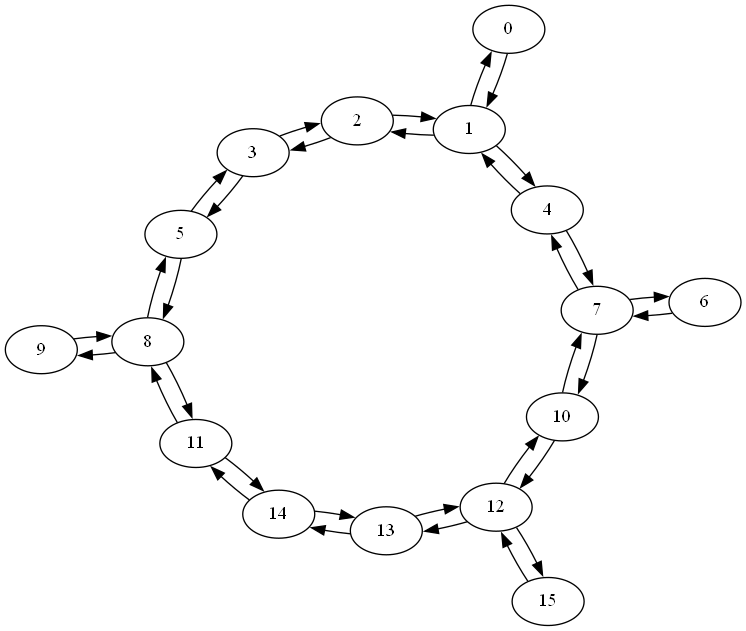

In [7]:
cm.draw()

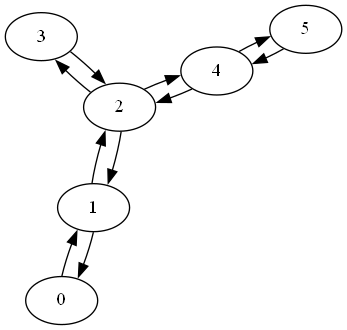

In [8]:
victim_cm = cm.reduce(victim_qubits)
victim_cm.draw()

# Create Victim Circuits

In [9]:
cx_edges = list(victim_cm.get_edges())
cx_edges

[(0, 1),
 (1, 0),
 (1, 2),
 (2, 1),
 (2, 3),
 (2, 4),
 (3, 2),
 (4, 2),
 (4, 5),
 (5, 4)]

In [10]:
# import math
# #nCk
# n = len(cx_edges)
# sum = 0
# for k in range(n):
#     c = math.comb(n, k)
#     sum += c
#     print(n, k, c)
#     print('=============')

# print(sum)

In [11]:
selected_qcs = []
for i in range(len(cx_edges)):
    cx_edges_combinations = combinations(cx_edges, i)
    for cx_edges_combination in cx_edges_combinations:
        qc = VictimCircuit(len(victim_qubits))
        for ctrl, target in cx_edges_combination:
            qc.cx(ctrl, target)
        depth = qc.depth()
        if depth < 3:
            selected_qcs.append(qc)

In [12]:
len(selected_qcs)

164

In [13]:
selected_150_qcs = random.sample(selected_qcs, 150)

depth_1/[(1, 0), (4, 5)]
<class 'models.VictimCircuit'>


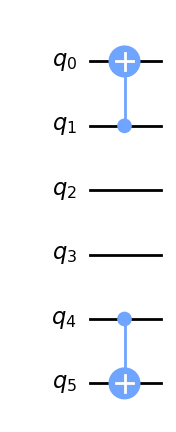

In [14]:
i = 5
print(selected_150_qcs[i])
print(type(selected_150_qcs[i]))
selected_150_qcs[i].draw('mpl')

## Save to pickle

In [15]:
pickle.dump(selected_150_qcs, open( "pickles/victim_circs/guadalupe_{}.p".format(victim_qubits), "wb" ) )